#### Plotting the obtained KCP rates

This Jupyter notebook shows an example how to retrieve the segment tables from the KCP analysis as a pandas dataframe, and how to plot the rate (A_values) in a histogram as well as a scatter plot.
This notebook also contains the accompanying scripts that can be run in the **Rover** widgets (histogram and bubble plot widget respectively).

@ Author: Nadia Huisjes, Duderstadt Lab  
https://duderstadt-lab.github.io/mars-docs/

In [1]:
import imagej
# One needs to add the path to the Fiji application on the computer
ij = imagej.init('/Applications/Fiji-2.app')
# Python packages
import scyjava as sc
from scyjava.convert import _pandas
import jnius
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jnius import autoclass
import seaborn as sns

#instantiate required classes to load archives
File = autoclass('java.io.File')
SingleMoleculeArchive = autoclass('de.mpg.biochem.mars.molecule.SingleMoleculeArchive')

In [2]:
# Here the archive is loaded. Add your file path here
yamaFile = File('/Users/nadiahuisjes/Desktop/archive_ome.yama')
archive = SingleMoleculeArchive(yamaFile)

In [5]:
# Makes a list of all A & B values and their errors for all molecules that have a segment table.

A_values=[]
A_sigma=[]
B_values=[]
B_sigma=[]

for UID in archive.getMoleculeUIDs():
    if archive.get(UID).hasSegmentsTable("T","y"):
        A_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("A",0))
        A_sigma.append(archive.get(UID).getSegmentsTable("T",'y').getValue("sigma_A",0))
        B_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("B",0))
        B_sigma.append(archive.get(UID).getSegmentsTable("T",'y').getValue("sigma_B",0))
        
# Note: make sure to provide the function arguments as 'x','y' not the other way around

,A_values,A_sigma,B_values,B_sigma
0,162.313109,0.347422,0.702098,0.013016
1,122.386939,0.286056,0.458954,0.015855
2,190.012194,0.296098,0.506077,0.062193
3,203.482441,0.212661,0.568207,0.007625
4,105.129704,0.211146,0.644950,0.010089
5,27.961300,0.222926,0.758568,0.009139
6,3.957002,0.180091,0.845307,0.007947
7,90.178272,0.169903,0.642520,0.006965
8,43.595101,0.166489,0.530827,0.008420
9,-18.376042,1.011082,0.674270,0.028754


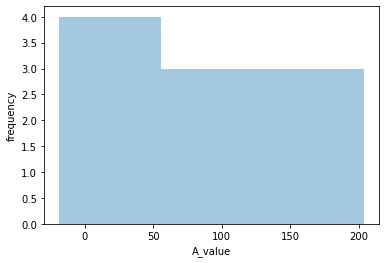

In [6]:
# Convert the data to a dataframe with pandas and plotting with seaborn

data = {'A_values':A_values,'A_sigma':A_sigma,'B_values':B_values,'B_sigma':B_sigma}
df = pd.DataFrame(data,columns=['A_values','A_sigma','B_values','B_sigma'])

ax=sns.distplot(A_values,bins=3,kde=False)  #set the bins appropriately
ax.set(xlabel='A_value', ylabel='frequency')
df

In [60]:
# Add this script to the scriptable widgets tab to load in Rover Dashboard (use the histogram widget)

#@ MoleculeArchive archive
#@OUTPUT String xlabel
#@OUTPUT String ylabel
#@OUTPUT String title
#@OUTPUT Integer bins
#@OUTPUT Double xmin
#@OUTPUT Double xmax
#@OUTPUT Double ymin
#@OUTPUT Double ymax

# Set global outputs
xlabel = "A_values"
ylabel = "Frequency"
title = "KCPA A_values"
bins = 3
xmin = -50
xmax = 250.0
ymin = 0.0
ymax = 10

# Series 1 Outputs (A_values)
#@OUTPUT Double[] series1_values
#@OUTPUT String series1_strokeColor
#@OUTPUT Integer series1_strokeWidth

series1_strokeColor = "black"
series1_strokeWidth = 2
series1_values = []

for UID in archive.getMoleculeUIDs():
    if archive.get(UID).hasSegmentsTable("T","y"):
        series1_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("A",0)) #Replace here



In [ ]:
# Replace the line marked with 'Replace here' with one of the other lines to create the respective histogram

        series1_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("A",0)) #A_values
        series1_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("sigma_A",0)) #A_sigma
        series1_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("B",0))      #B_values
        series1_values.append(archive.get(UID).getSegmentsTable("T",'y').getValue("sigma_B",0))  #B_sigma
        


,A_values,A_sigma,B_values,B_sigma,num
0,162.313109,0.347422,0.702098,0.013016,0
1,122.386939,0.286056,0.458954,0.015855,1
2,190.012194,0.296098,0.506077,0.062193,2
3,203.482441,0.212661,0.568207,0.007625,3
4,105.129704,0.211146,0.644950,0.010089,4
5,27.961300,0.222926,0.758568,0.009139,5
6,3.957002,0.180091,0.845307,0.007947,6
7,90.178272,0.169903,0.642520,0.006965,7
8,43.595101,0.166489,0.530827,0.008420,8
9,-18.376042,1.011082,0.674270,0.028754,9


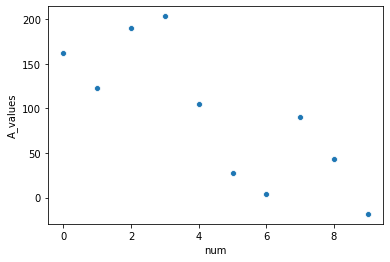

In [7]:
# Add a random number column to separate datapoints and plot as a scatterplot
df['num']=[0,1,2,3,4,5,6,7,8,9]
sns.scatterplot(x='num',y='A_values',data=df)
df

In [84]:
## Recreate this with a Script for a bubble plot widget

#@ MoleculeArchive archive
#@OUTPUT String xlabel
#@OUTPUT String ylabel
#@OUTPUT String title
#@OUTPUT Double xmin
#@OUTPUT Double xmax
#@OUTPUT Double ymin
#@OUTPUT Double ymax

# Set global outputs
xlabel = "A_values"
ylabel = "Frequency"
title = "KCPA A_values"

xmin = -1
xmax = 11
ymin = -50
ymax = 250

# Series 1 Outputs
#@OUTPUT Double[] series1_xvalues
#@OUTPUT Double[] series1_yvalues
#@OUTPUT Double[] series1_size
#@OUTPUT String[] series1_label
#@OUTPUT String[] series1_color
#@OUTPUT String series1_markerColor

series1_markerColor = "lightgreen"
series1_yvalues = []

for UID in archive.getMoleculeUIDs():
    if archive.get(UID).hasSegmentsTable("T","y"):
        series1_yvalues.append(archive.get(UID).getSegmentsTable("T",'y').getValue("A",0)) #Replace here

series1_size = [4.0]*len(series1_yvalues)
series1_color = ["blue"]*len(series1_yvalues) # Needs to have the same length as the lengt of series1_yvalues
series1_xvalues = list(range(0,len(series1_yvalues))) #Set arbitrary x-values to display non-overlapping
series1_label = list(range(0,len(series1_yvalues))) #Set arbitrary x-values labels 